
  ## **Assignment 2: Bayesian Decision Theory**

---

The goal of this exercise is familiarize one self with the bayesian decision theory, through 2 famous questions.

First one being, calculating the probability that a person is carrying a rare disease given that a test they took, came back positive.

And the second one is split into 2 parts. In a classroom setting of 23 students and a teacher, firstly we explore the probability that 2 students may have the same birthday. And in the second part, we try to approximate the teacher's birthday, by analyzing random guesses that were done by the students.



# **PART A: DISEASE DETECTION**

We have a person that has possibly contracted a rare disease, and we want to test if they actually have it.

There exists a test for the disease that we will use to determine if he is actually carrying it.

The test's sensitivity is 99%, which means that given the person is sick, the test's output is positive 99% of the times.<br>
The test's specificity is 96%, which means that given the person is **not** sick, the test's ouput is negative 96% of the times, or positive 4% of the times.

To calculate the probability of the person actually having the disease given that they tested positive, we will be using the bayesian theorem.

We are given the following facts:

*   The total population is $6.8 \times 10^9$
*   The total cases of the disease is $290,000$
*   The sensitivity is $99\%$
*   The specificity is $96\%$

<br>

We will use the formula: $P(D^+|T^+) = \frac{P(T^+|D^+) * P(D^+) }{P(T^+)}$ , where


*   $P(D^+|T^+)$ is the **posterior**, probability of a person actually carrying the disease given that the test is positive.
*   $P(T^+|D^+)$ is the **likelihood**, probabilty of a person testing positive given that he is carrying the disease, the sensitivity of the test.
*   $P(D^+)$ is the **prior**, probability of a person contracting the disease.
*   $P(T^+)$ is the **evidence**, probability of a test being positive.

<br>


The term $P(T^+)$ is given by the formula: $P(T^+) = P(T^+|D^+) * P(D^+) + P(T^+|D^-) * P(D^-)$ where,


*   $P(T^+|D^+) * P(D^+)$ is the probability of a test being positive given that the patient is carrying the disease, weighted by the probability of a random person contracting the disease, or rather the **sensitivity** of the test weighted by the **prior probability**.

*   $P(T^+|D^-) * P(D^-)$ is the probability of a test being positive given that the patient is **not** carrying the disease, weighted by the probabilty of a random person **not** contracting the disease, or rather **(1 - specificity)** weighted by the **(1 - prior probability)**.












In [ ]:
#Input: The sensitivity, specificity of a test, and the prior probability of the disease.
#Output: The posterior probability of the disease being present given that the test is positive.
def postProb(sens, spec, prior):
  likelihood = sens
  evidence = (sens * prior) + ((1 - spec) * (1 - prior))
  return (likelihood * prior) / evidence

In [ ]:
population = 6800000000
cases = 290000
sens = 0.99
spec = 0.96

prior = cases/population

first_post = postProb(sens,spec,prior)
print(f"The probability of a person actually having the disease given that it tested positive is: {first_post*100}%")

The probability of a person actually having the disease given that it tested positive is: 0.10544466909435468%


We notice that the probability is actually very low, since the overall probability of catching the disease is minute, 0.0042%.

Since this is such a rare disease, we will be retesting our patient to be more sure about the results.

Given that the second test is also positive, what is the probability now of the patient carrying the disease?

We will use the same formula, but now our **prior probability** will be the posterior that we calculated.

In [ ]:
sec_post = postProb(sens,spec,first_post)
print(f"The probability of a person actually having the disease given that they tested positive twice is: {sec_post*100}%")

The probability of a person actually having the disease given that they tested positive twice is: 2.545995907294712%


We see that, while our probability has increased by a factor of 20, it still remains relatively small.

This is due, as mentioned before, to the rareness of the disease.

But what if the disease was more previlent? We can explore this idea, by changing the overall cases that were observed.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

cases = np.array([2000000, 7500000, 1000000000])
prior = cases / population
print(prior)

vPost = np.vectorize(postProb)
casesPost = vPost(prior = prior, sens = sens, spec = spec)
print(casesPost)


[0.00029412 0.00110294 0.14705882]
[0.00722892 0.02660099 0.8101473 ]


As we can observe, the posterior probability of a patient carrying the disease is propotional to the prior probability of him contracting him.

This makes sense, since the more prevalent the disease is, the more probable it is, that someone may be positive.

If the disease has affected ≈1/10 of the population, the probability that our patient is actually positive is 81%.

# **PART B: BIRTHDAY DETECTION**



 **QUESTION A: Student's Birthdays**

  A teacher wants to introduce to their classroom of 23 students, the basics of statistical analysis.

  The first topic that they will discuss, is the probability of 2 randomly selected students, having the same or different birthdays.

  We assume that in a calendar year, there are 365 days.
  Thus, the probability of 2 students sharing the same birthday is $$\frac{1}{365} = 0.0027$$ and the probability of them having different birthdays is $$1 - \frac{1}{365} = 0.997$$

<br>

 Now a new question arises, how many pairs of 2 students can we have, to compare all 23 birthdays against each other?

 If we rephrase the question, we are basically asking, from a set of 23 items(students), how many combinations of 2 students are there?

 This can be answered by using the binomial coefficient where,

*   n = Number of students = 23
*   k = Subset Size = 2

So the number of total combinations is:
$$ \binom{n}{k} = \binom{23}{2} =  \frac{23!}{2!(23-2)!} = 253$$<br>




We can generalize the first problem, and find the probability of a class of **m** students all having a different birthday.






In [ ]:
#Input: Size of classroom
#Output: Probability of all students having a different birthday
def diffBirthProb(m):
    p = 1
    for i in range(m):
        p *= (365 - i) / 365
    return p

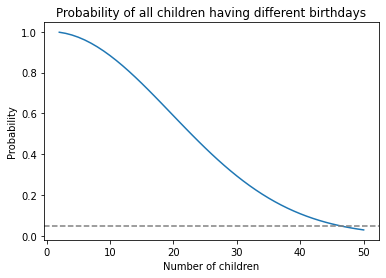

In [ ]:
m_values = np.arange(2, 51)
probabilities = np.vectorize(diffBirthProb)(m_values)

threshold = 0.05

plt.plot(m_values, probabilities)
plt.axhline(y=threshold, color='gray', linestyle='--')
plt.title('Probability of all children having different birthdays')
plt.xlabel('Number of children')
plt.ylabel('Probability')
plt.show()

We can observe that, as the number of students increases, the probability of none of them sharing their birthday diminishes.

If we assume that a probability greater than 0.95, constitutes a mathematical certainty that 2 students will have the same birthday, then the number of the classroom will have to be:

In [ ]:
birthday_coll = np.where(probabilities < threshold)[0]
print(f"Number of students must be at least {birthday_coll[0]} to be certain that 2 share the same birthday.")

Number of students must be at least 45 to be certain that 2 share the same birthday.


**QUESTION 2: Bayesian Update**

Now the teacher wants to demonstrate to the class, how they can, with a series of guesses, aproximate her birthday, without any prior knowledge.

She instructs each student to come up to her and tell her their guess for her birthday, without the class hearing them. She then writes in the board if that guess is on the Left(before) or Right(after) her birthday.

There are in total 23 guesses, and lets assume that they are the following:L L L R L R R L R R R L L L R L L R R R L L L

So in total we have:


*   A year has 365 days
*   We have 23 guesses in total
*   Guesses: L L L R L R R L R R R L L L R L L R R R L L L

Based on those guesses we will calculate, for each day of the year, the probability of the teacher's birthday being that day.

Before we actually do that, lets see some examples, in order to better understand the problem.

Given the teacher's birthday, how does the year's distribution look like if we have:


*  A single guess being left(n = 1, k = 1)
*  5 guesses in a row being left(n = 5, k = 5)
*  4 guesses out of 10 being left(n = 10, k = 4)

We can calculate this, by using the binomial distribution, where:


*   n: total guesses
*   k: correct guesses, guess was Left
*   p: probability of guess being left










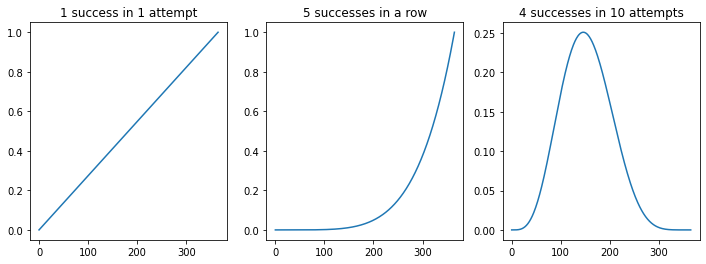

In [ ]:
def binom(n,k,p):
  return np.math.comb(n, k) * np.power(p, k) * np.power(1 - p, n - k)

#vectorize function to use over an array
vBinom = np.vectorize(binom)

# probability of a guess being left based on the birthday
p = np.arange(0, 366) / 365

#first scenario
n = 1
k = 1
sc_1 = vBinom(n = n, k = k, p = p)

#second scenario
n = 5
k = 5
sc_2 = vBinom(n = n, k = k, p = p)

#third scenario
n = 10
k = 4
sc_3 = vBinom(n = n, k = k, p = p)


#plot the 3 distributions
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

#set plots
axs[0].plot(sc_1)
axs[1].plot(sc_2)
axs[2].plot(sc_3)

#set titles
axs[0].set_title('1 success in 1 attempt')
axs[1].set_title('5 successes in a row')
axs[2].set_title('4 successes in 10 attempts')

plt.show()

We see that the binomial distribution can be a useful tool, if we want to test some general scenarios.

But in the case that we want examine, we have a specific sequence of guesses that we want to calculate.

We will use bayesian update, to achieve this. In the first guess, our prior probability is 1/365 for all days.

After guessing L, the prior probability of the next guess will be the posterior probability that we calculated in this step, repeating this process for each guess.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
from functools import partial
import matplotlib.animation as animation
from matplotlib import rc
rc('animation', html='jshtml')

In [ ]:
def prepare_animation(ax, names, posteriors):
  def animate(frame_number):
    ax.clear()
    plot = ax.bar(names, posteriors[frame_number])
    return plot
  return animate

#Input: Birthday day ranging in 0-365, 1 if guess is L, 0 otherwise
#Ouput: Likelihood that a guess was left of this day
def compute_likelihood(day, guess):
  return (day/365) if (guess == 1) else (365 - day)/365




#Input: A list containing all the guesses, 1 for left, 0 for right
#Ouput: An array of len(guesses) + 1, size where each index is the posterior
#       for every iteration of the bayesian update
def bayes_upd( guesses ):

  #set up prior, posteriors
  priors = np.ones(366) / 365
  posteriors = np.zeros((len(guesses) + 1, 366))


  #iteritavely calculate posteriors
  posteriors[0] = priors
  for i, guess in enumerate(guesses):
    priors = posteriors[i]
    likelihood = np.array([compute_likelihood(day,guess) for day in range(366)])
    evidence = np.sum(priors * likelihood)
    posteriors[i+1] = (likelihood * priors) / evidence

  return posteriors


# L L L R L R R L R R R L L L R L L R R R L L L
guesses = [1,1,1,0,1,0,0,1,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1]
posts = bayes_upd(guesses)
print(np.argmax(posts[-1]))
print(np.max(posts[-1]))



206
0.010911354904700677


As we can see, after using the bayesian update for all of our guesses, the most probable day for the teacher's birthday is day 206.

We can graph the last posterior in order to get a better feel for the distribution

Text(0.5, 1.0, "Probability of teacher's birthday")

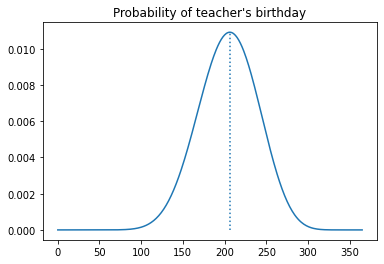

In [ ]:
fig, ax = plt.subplots()

plt.plot(posts[-1])

plt.vlines(x=np.argmax(posts[-1]), ymin=0, ymax=np.max(posts[-1]), linestyles='dotted')

plt.title("Probability of teacher's birthday")

And we can also animate each posterior, to better understand how the bayesian update works on each iteration.

In [ ]:

names = np.arange(0,366)
anim = animation.FuncAnimation(fig, prepare_animation(ax, names, posts), len(posts), repeat=True, blit=False)
anim